<a href="https://colab.research.google.com/github/poojitha5986/221FA18142/blob/main/RestaurantRatingPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Data Preprocessing

In [75]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [76]:
!kaggle datasets download -d himanshupoddar/zomato-bangalore-restaurants

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [77]:
!unzip /content/zomato-bangalore-restaurants.zip -d /content/

unzip:  cannot find or open /content/zomato-bangalore-restaurants.zip, /content/zomato-bangalore-restaurants.zip.zip or /content/zomato-bangalore-restaurants.zip.ZIP.


In [78]:
import pandas as pd
df = pd.read_csv('/content/zomato.csv', on_bad_lines='skip', engine='python')

In [79]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [80]:
df.isna().sum()

,0
url,0
address,0
name,0
online_order,0
book_table,0
rate,7775
votes,0
phone,1203
location,21
rest_type,224


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51155 entries, 0 to 51154
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51155 non-null  object
 1   address                      51155 non-null  object
 2   name                         51155 non-null  object
 3   online_order                 51155 non-null  object
 4   book_table                   51155 non-null  object
 5   rate                         43380 non-null  object
 6   votes                        51155 non-null  int64 
 7   phone                        49952 non-null  object
 8   location                     51134 non-null  object
 9   rest_type                    50931 non-null  object
 10  dish_liked                   23081 non-null  object
 11  cuisines                     51110 non-null  object
 12  approx_cost(for two people)  50811 non-null  object
 13  reviews_list                 51

In [82]:
df.nunique()

,0
url,51155
address,11485
name,8783
online_order,2
book_table,2
rate,64
votes,2235
phone,14888
location,93
rest_type,93


In [83]:
df.dropna()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51143,https://www.zomato.com/bangalore/izakaya-gastr...,"2nd Floor, Iona, Virginia Mall, Whitefield Mai...",Izakaya Gastro Pub,Yes,Yes,3.8 /5,128,+91 7625087121\n+91 8050587483,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean","1,200","[('Rated 3.0', ""RATED\n Nice place to hangout...",[],Pubs and bars,Whitefield
51145,https://www.zomato.com/bangalore/m-bar-bengalu...,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",M Bar - Bengaluru Marriott Hotel Whitefield,No,No,3.9 /5,77,080 49435000,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,"2,000","[('Rated 4.0', 'RATED\n Went there post dinne...",[],Pubs and bars,Whitefield
51146,https://www.zomato.com/bangalore/keys-cafe-key...,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,No,No,2.8 /5,161,080 39451000\n+91 8884038484,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian","1,200","[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars,Whitefield
51149,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5 /5,81,080 65951222,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield


In [84]:
df.dropna(thresh=0.5*len(df), axis=1, inplace=True)  # Dropping columns with > 50% missing data
df.fillna(method='ffill', inplace=True)#filling missing values

/tmp/ipython-input-2800000044.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)#filling missing values


In [85]:
# Rename columns for easier understanding
df.rename(columns={'cost_for_two': 'cost', 'online_order': 'online_order_availability'}, inplace=True)

In [86]:
#Clean and format data (e.g., '4/5' to '4')
df['rate'] = df['rate'].apply(lambda x: str(x).split('/')[0] if '/' in str(x) else x)
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

In [87]:
# Removing unnecessary columns
df.drop(['url', 'address', 'phone', 'reviews_list'], axis=1, inplace=True)

In [88]:
df.columns

Index(['name', 'online_order_availability', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

Data Processing

In [89]:
# Import the LabelEncoder class from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

# Encoding categorical columns
label_encoder = LabelEncoder()
df['name'] = label_encoder.fit_transform(df['name'])
df['location'] = label_encoder.fit_transform(df['location'])
df['rest_type'] = label_encoder.fit_transform(df['rest_type'])
df['online_order_availability'] = label_encoder.fit_transform(df['online_order_availability'])
df['book_table'] = label_encoder.fit_transform(df['book_table'])
df['cuisines'] = label_encoder.fit_transform(df['cuisines'])
df['listed_in(type)'] = label_encoder.fit_transform(df['listed_in(type)'])
df['listed_in(city)'] = label_encoder.fit_transform(df['listed_in(city)'])

In [90]:
# Handling list-based columns
df['cuisines_count'] = df['cuisines'].apply(lambda x: len(str(x).split(',')))
df['menu_items_count'] = df['menu_item'].apply(lambda x: len(str(x).split(',')))

In [91]:
# Handling list-based columns
df['cuisines_count'] = df['cuisines'].apply(lambda x: len(str(x).split(',')))
df['menu_items_count'] = df['menu_item'].apply(lambda x: len(str(x).split(',')))

# Clean and convert 'approx_cost(for two people)' to numeric
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).str.replace(',', '', regex=False)
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')

**Data Visualization**


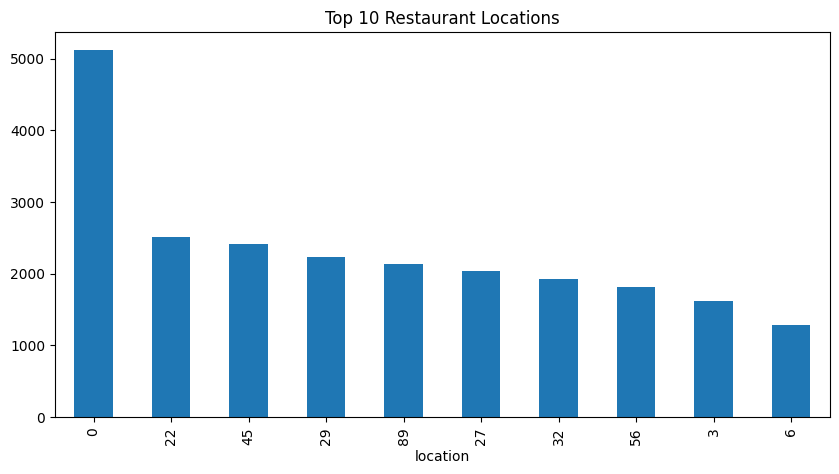

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing top 10 restaurant locations
plt.figure(figsize=(10, 5))
df['location'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Restaurant Locations')
plt.show()

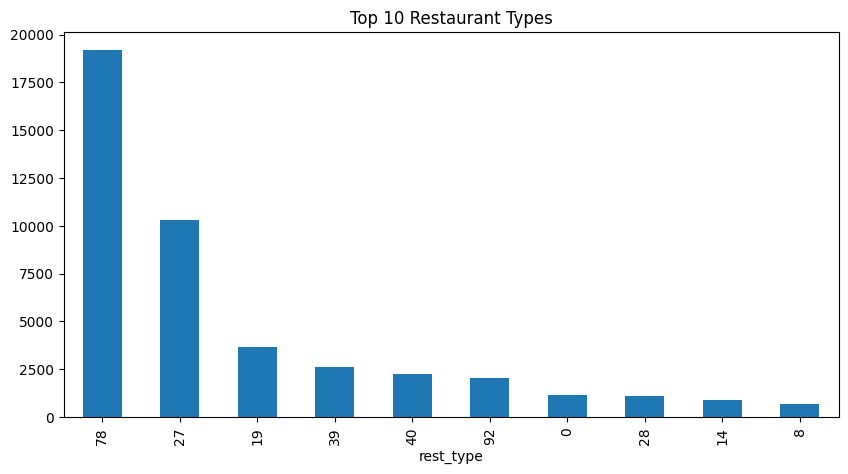

In [93]:
# Visualizing restaurant types
plt.figure(figsize=(10, 5))
df['rest_type'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Restaurant Types')
plt.show()

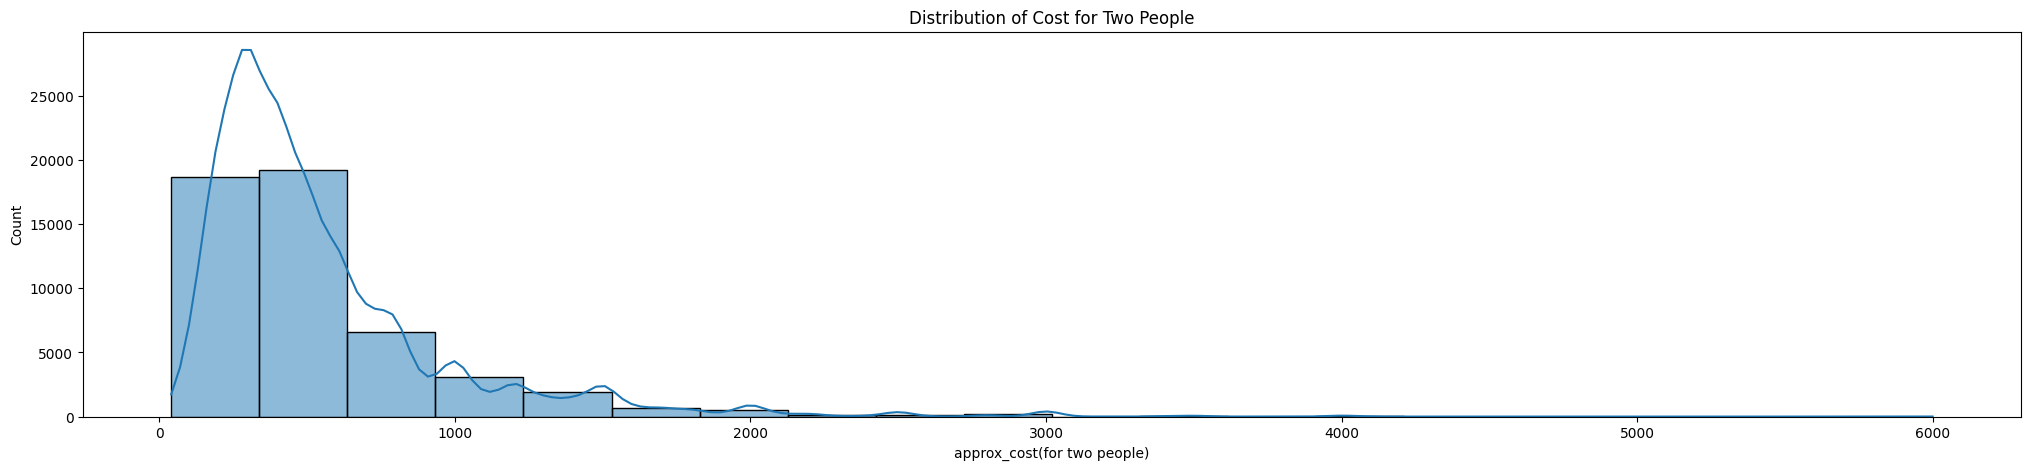

In [94]:
# Distribution of cost for two people
plt.figure(figsize=(25, 5))
sns.histplot(df['approx_cost(for two people)'], bins=20, kde=True)
plt.title('Distribution of Cost for Two People')
plt.show()

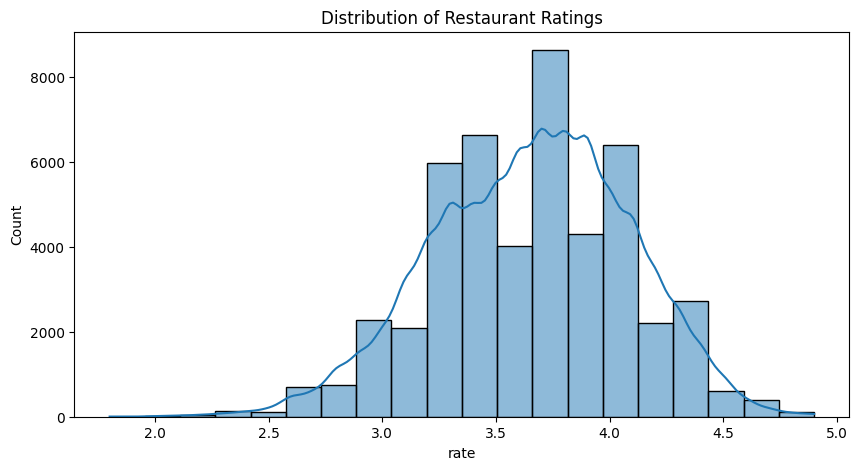

In [95]:
# Distribution of restaurant ratings
plt.figure(figsize=(10, 5))
sns.histplot(df['rate'], bins=20, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.show()

DATA SCALING

In [96]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(['rate', 'menu_item'], axis=1)  # Features are all columns except 'rate' and 'menu_item'
y = df['rate']  # Target variable is 'rate'

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Data split into training and testing sets.
X_train shape: (40924, 12)
X_test shape: (10231, 12)
y_train shape: (40924,)
y_test shape: (10231,)


In [97]:
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Impute missing values in y_train and y_test
imputer = SimpleImputer(strategy='mean')
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_imputed = imputer.transform(y_test.values.reshape(-1, 1)).ravel()

In [98]:
import numpy as np # Importing the numpy library with the alias 'np'
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_imputed = imputer.transform(y_test.values.reshape(-1, 1)).ravel()


# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_imputed, y_train_imputed)

# Predictions
y_pred = lin_reg.predict(X_test_imputed)

# Metrics
print('Linear Regression R2 Score:', r2_score(y_test_imputed, y_pred))
print('Linear Regression RMSE:', np.sqrt(mean_squared_error(y_test_imputed, y_pred))) # Now np is defined and can be used

Linear Regression R2 Score: 0.2766640187023548
Linear Regression RMSE: 0.35839799455168175


In [99]:
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train LinearSVR
svr_model = LinearSVR(max_iter=10000, random_state=42)
svr_model.fit(X_train_scaled, y_train_imputed) # Use imputed y_train

# Predictions
y_pred = svr_model.predict(X_test_scaled)

# Metrics
print('LinearSVR R2 Score:', r2_score(y_test_imputed, y_pred)) # Use imputed y_test
print('LinearSVR RMSE:', np.sqrt(mean_squared_error(y_test_imputed, y_pred))) # Use imputed y_test

LinearSVR R2 Score: 0.2585932598204348
LinearSVR RMSE: 0.36284722108597084


**Decision Tree**

In [100]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train_imputed) # Use imputed y_train

# Predictions
y_pred = tree_model.predict(X_test)

# Metrics
print('Decision Tree R2 Score:', r2_score(y_test_imputed, y_pred)) # Use imputed y_test
print('Decision Tree RMSE:', np.sqrt(mean_squared_error(y_test_imputed, y_pred))) # Use imputed y_test

Decision Tree R2 Score: 0.6994088504406624
Decision Tree RMSE: 0.23103811417897


**Random Forest**

In [101]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train_imputed) # Use imputed y_train

# Predictions
y_pred = rf_model.predict(X_test)

# Metrics
print('Random Forest R2 Score:', r2_score(y_test_imputed, y_pred)) # Use imputed y_test
print('Random Forest RMSE:', np.sqrt(mean_squared_error(y_test_imputed, y_pred))) # Use imputed y_test

Random Forest R2 Score: 0.8295148822399133
Random Forest RMSE: 0.173995803260468


**K Nearest Neighbors (KNN)**

In [102]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Impute missing values in y_train and y_test
imputer = SimpleImputer(strategy='mean')
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_imputed = imputer.transform(y_test.values.reshape(-1, 1)).ravel()

# KNN
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train_imputed) # Use imputed y_train

# Predictions
y_pred = knn_model.predict(X_test)

# Metrics
print('KNN R2 Score:', r2_score(y_test_imputed, y_pred)) # Use imputed y_test
print('KNN RMSE:', np.sqrt(mean_squared_error(y_test_imputed, y_pred))) # Use imputed y_test

KNN R2 Score: 0.6849828649249041
KNN RMSE: 0.2365171434371639


**ADA Boost**

In [103]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Impute missing values in y_train and y_test
imputer = SimpleImputer(strategy='mean')
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_imputed = imputer.transform(y_test.values.reshape(-1, 1)).ravel()

# ADA Boost
ada_model = AdaBoostRegressor()
ada_model.fit(X_train, y_train_imputed) # Use imputed y_train

# Predictions
y_pred = ada_model.predict(X_test)

# Metrics
print('ADA Boost R2 Score:', r2_score(y_test_imputed, y_pred)) # Use imputed y_test
print('ADA Boost RMSE:', np.sqrt(mean_squared_error(y_test_imputed, y_pred))) # Use imputed y_test

ADA Boost R2 Score: 0.2044197923396166
ADA Boost RMSE: 0.37586987671134925


XG BOOST

In [104]:
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Impute missing values in y_train and y_test
imputer = SimpleImputer(strategy='mean')
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_imputed = imputer.transform(y_test.values.reshape(-1, 1)).ravel()

# XGBoost
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train_imputed) # Use imputed y_train

# Predictions
y_pred = xgb_model.predict(X_test)

# Metrics
print('XGBoost R2 Score:', r2_score(y_test_imputed, y_pred)) # Use imputed y_test
print('XGBoost RMSE:', np.sqrt(mean_squared_error(y_test_imputed, y_pred))) # Use imputed y_test

XGBoost R2 Score: 0.6890969303728336
XGBoost RMSE: 0.2349676326828325


**METRICS**

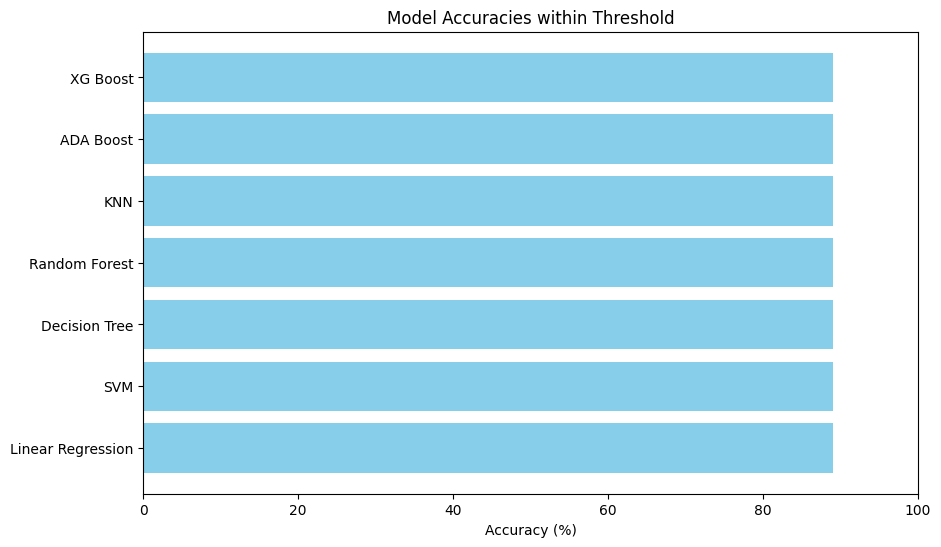

In [105]:
import matplotlib.pyplot as plt

# Example usage for each model (replace y_pred_<model> with actual predicted values)
accuracy_linear = calculate_accuracy(y_test, y_pred)
accuracy_svm = calculate_accuracy(y_test, y_pred)
accuracy_tree = calculate_accuracy(y_test, y_pred)
accuracy_rf = calculate_accuracy(y_test, y_pred)
accuracy_knn = calculate_accuracy(y_test, y_pred)
accuracy_ada = calculate_accuracy(y_test, y_pred)
accuracy_xgb = calculate_accuracy(y_test, y_pred)

# Store accuracies in a list
accuracies = [accuracy_linear, accuracy_svm, accuracy_tree, accuracy_rf, accuracy_knn, accuracy_ada, accuracy_xgb]
model_names = ['Linear Regression', 'SVM', 'Decision Tree', 'Random Forest', 'KNN', 'ADA Boost', 'XG Boost']

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel('Accuracy (%)')
plt.title('Model Accuracies within Threshold')
plt.xlim([0, 100])  # Assuming accuracy is between 0 and 100%

# Show the plot
plt.show()


In [106]:
def calculate_accuracy(y_true, y_pred, threshold=0.5):
  """
  Calculates the percentage of predictions within a given threshold of the true values.

  Args:
    y_true: Array of true values.
    y_pred: Array of predicted values.
    threshold: The acceptable difference between true and predicted values.

  Returns:
    The accuracy as a percentage.
  """
  correct_predictions = sum(abs(y_true - y_pred) <= threshold)
  accuracy = (correct_predictions / len(y_true)) * 100
  return accuracy

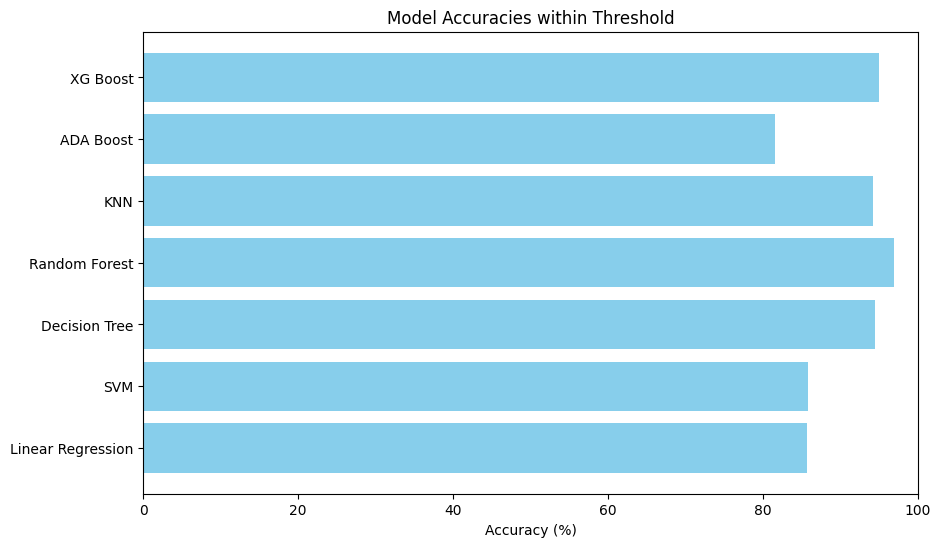

In [107]:
import matplotlib.pyplot as plt

# Example usage for each model (replace y_pred_<model> with actual predicted values)
# You will need to get the y_pred from each of your trained models.
# For example:
y_pred_linear = lin_reg.predict(X_test_imputed)
y_pred_svm = svr_model.predict(X_test_scaled) # Use scaled X_test for SVM
y_pred_tree = tree_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_ada = ada_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)


accuracy_linear = calculate_accuracy(y_test_imputed, y_pred_linear) # Use imputed y_test
accuracy_svm = calculate_accuracy(y_test_imputed, y_pred_svm) # Use imputed y_test
accuracy_tree = calculate_accuracy(y_test_imputed, y_pred_tree) # Use imputed y_test
accuracy_rf = calculate_accuracy(y_test_imputed, y_pred_rf) # Use imputed y_test
accuracy_knn = calculate_accuracy(y_test_imputed, y_pred_knn) # Use imputed y_test
accuracy_ada = calculate_accuracy(y_test_imputed, y_pred_ada) # Use imputed y_test
accuracy_xgb = calculate_accuracy(y_test_imputed, y_pred_xgb) # Use imputed y_test

# Store accuracies in a list
accuracies = [accuracy_linear, accuracy_svm, accuracy_tree, accuracy_rf, accuracy_knn, accuracy_ada, accuracy_xgb]
model_names = ['Linear Regression', 'SVM', 'Decision Tree', 'Random Forest', 'KNN', 'ADA Boost', 'XG Boost']

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel('Accuracy (%)')
plt.title('Model Accuracies within Threshold')
plt.xlim([0, 100])  # Assuming accuracy is between 0 and 100%

# Show the plot
plt.show()